# Assignment 1

# Data Preparation

### Needed imports

In [86]:
import pandas as pd
import os
# from datetime import datetime
# import re # regex support
import matplotlib.pyplot as plt
import numpy as np

### Data gathering

In [87]:
data_pathname = os.path.join(os.getcwd(), "data")
filename_citibike = "2015-citibike_tripdata_combined.csv"
filename_citibike_sample = "2015-citibike_tripdata_combined_sample.csv"
filename_weather = "weather_data_nyc.csv"
encoding_type = "utf-8"

use_sample_data = True # Change this flag if you want to use the full data set (~1,7gb). Warning: This will change the runtime significantly

In [88]:
df_citibike = pd.DataFrame()
if use_sample_data:
    df_citibike = pd.read_csv(os.path.join(data_pathname, filename_citibike_sample), encoding=encoding_type)
else:
    df_citibike = pd.read_csv(os.path.join(data_pathname, filename_citibike), encoding=encoding_type)

df_weather = pd.read_csv(os.path.join(data_pathname, filename_weather), encoding=encoding_type)


# ETL Citibike dataset

In [89]:
print(f"Citibike DataFrame length: {len(df_citibike)}")
print(f"Show first and last rows of Citibike:")
df_citibike.iloc[[1, -1]]

Citibike DataFrame length: 99380
Show first and last rows of Citibike:


,Unnamed: 0,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
1,1043212,1542,4/13/2015 08:07:06,4/13/2015 08:32:48,545,E 23 St & 1 Ave,40.736502,-73.978095,415,Pearl St & Hanover Square,40.704718,-74.009260,19785,Subscriber,1957.0,1
99379,8672150,418,11/14/2015 15:39:48,11/14/2015 15:46:46,317,E 6 St & Avenue B,40.724537,-73.981854,301,E 2 St & Avenue B,40.722174,-73.983688,19774,Subscriber,1961.0,1


In [90]:
print("Citibike DataFrame data types per column (auto import):")
print(f"{df_citibike.dtypes}")

Citibike DataFrame data types per column (auto import):
Unnamed: 0                   int64
tripduration                 int64
starttime                   object
stoptime                    object
start station id             int64
start station name          object
start station latitude     float64
start station longitude    float64
end station id               int64
end station name            object
end station latitude       float64
end station longitude      float64
bikeid                       int64
usertype                    object
birth year                 float64
gender                       int64
dtype: object


### Renaming

In [91]:
df_citibike.rename(columns={"Unnamed: 0": "uniqueid"}, inplace=True)

In [92]:
df_citibike.rename(columns={"start station id": "start_station_id", 
                            "start station name": "start_station_name",
                            "start station latitude": "start_station_latitude",
                            "start station longitude": "start_station_longitude",
                            "end station id": "end_station_id",
                            "end station name": "end_station_name",
                            "end station latitude": "end_station_latitude",
                            "end station longitude": "end_station_longitude",
                            "birth year": "birth_year"}, inplace=True)

### Type Conversion

In [93]:
print("Convert column starttime and stoptime from object to datetime") # Some missing seconds values
df_citibike['starttime'] = pd.to_datetime(df_citibike['starttime'], format="%m/%d/%Y %H:%M:%S", errors="coerce").fillna(pd.to_datetime(df_citibike['starttime'], format="%m/%d/%Y %H:%M", errors="coerce"))
df_citibike['stoptime']  = pd.to_datetime(df_citibike['stoptime' ], format="%m/%d/%Y %H:%M:%S", errors="coerce").fillna(pd.to_datetime(df_citibike['stoptime' ], format="%m/%d/%Y %H:%M", errors="coerce"))
print(f"Example after conversion: {df_citibike['stoptime'][42]} with type {df_citibike['stoptime'].dtype}")

Convert column starttime and stoptime from object to datetime
Example after conversion: 2015-06-30 17:59:00 with type datetime64[ns]


In [94]:
print("Checking for categorial values in the columns")
for column in df_citibike.columns:
    print(f"Column {column} has {df_citibike[column].value_counts().count()} distinct values")

Checking for categorial values in the columns
Column uniqueid has 99380 distinct values
Column tripduration has 4294 distinct values
Column starttime has 97028 distinct values
Column stoptime has 97046 distinct values
Column start_station_id has 485 distinct values
Column start_station_name has 494 distinct values
Column start_station_latitude has 507 distinct values
Column start_station_longitude has 507 distinct values
Column end_station_id has 488 distinct values
Column end_station_name has 497 distinct values
Column end_station_latitude has 510 distinct values
Column end_station_longitude has 510 distinct values
Column bikeid has 8348 distinct values
Column usertype has 2 distinct values
Column birth_year has 77 distinct values
Column gender has 3 distinct values


In [95]:
print("Convert to categorial variables")
df_citibike["start_station_id"] = df_citibike["start_station_id"].astype("category")
df_citibike["end_station_id"] = df_citibike["end_station_id"].astype("category")
df_citibike["usertype"] = df_citibike["usertype"].astype("category")
df_citibike["gender"] = df_citibike["gender"].astype("category")

Convert to categorial variables


In [96]:
print("Convert birth_year to Integer")
df_citibike["birth_year"] = df_citibike["birth_year"].astype("Int64") #Int64Dtype can handle NaN values compared to int64

Convert birth_year to Integer


### Creating a date column

In [97]:
df_citibike["Date"] = pd.to_datetime(df_citibike["starttime"].dt.date)

### Detect and handle outliers

Check tripduration values for outliers


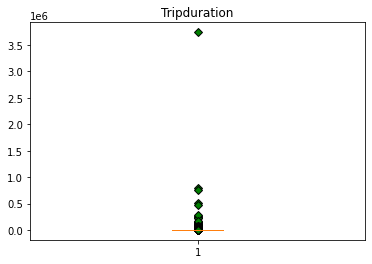

In [98]:
# TODO: do this
print("Check tripduration values for outliers")
green_diamond = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('Tripduration')
bp = ax1.boxplot(df_citibike['tripduration'], flierprops=green_diamond)
plt.show()

In [126]:
for key in bp:
    print(f'{key}: {[item.get_ydata() for item in bp[key]]}\n')

whiskers: [array([385.,  60.]), array([1029., 1995.])]

caps: [array([60, 60], dtype=int64), array([1995, 1995], dtype=int64)]

boxes: [array([ 385.,  385., 1029., 1029.,  385.])]

medians: [array([620., 620.])]

fliers: [array([2126, 2819, 2352, ..., 2630, 2199, 2175], dtype=int64)]

means: []



In [127]:
fliers = [item.get_ydata() for item in bp['fliers']]

q1 = [round(min(item.get_ydata()), 1) for item in bp['boxes']]

lower_outliers = []
upper_outliers = []

for i in range(len(fliers)):
    lower_outliers_by_box = []
    upper_outliers_by_box = []
    for outlier in fliers[i]:
        if outlier < q1[i]:
            lower_outliers_by_box.append(round(outlier, 1))
        else:
            upper_outliers_by_box.append(round(outlier, 1))
    
    #storing outlyers
    lower_outliers.append(lower_outliers_by_box)
    upper_outliers.append(upper_outliers_by_box)

print(f'Lower outliers: {len(lower_outliers_by_box)}\n'
      f'Upper outliers: {len(upper_outliers_by_box)}')

Lower outliers: 0
Upper outliers: 4074


Finding a resonable tripduration limit:


NYC Area = 789,4 km²


d=root(4A/π)

In [129]:
#NYC Area
import math
nycArea = 789400

dOfNYC= math.sqrt(4*nycArea/math.pi)*2

print(f"{dOfNYC}")

2005.0888225851118


In [130]:
limit = dOfNYC
column_name = 'tripduration'

column = df_citibike[column_name]

count = column[column > limit].count()

print(f"{count}")

5085


In [124]:
df_citibike2 = df_citibike[df_citibike.tripduration <= dOfNYC]


New Chart after Outlyers have been handled


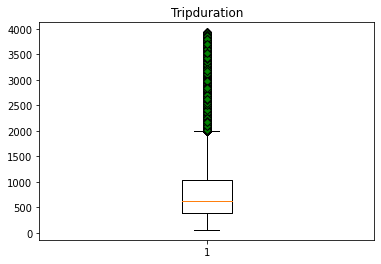

In [131]:
print("New Chart after Outlyers have been handled")
green_diamond = dict(markerfacecolor='g', marker='D')
fig2, ax2 = plt.subplots()
ax2.set_title('Tripduration')
bp = ax2.boxplot(df_citibike2['tripduration'], flierprops=green_diamond)
plt.show()

### Final Checks

In [ ]:
print("Check for missing values in Citibike:")
df_citibike.isna().sum()

Check for missing values in Citibike:


uniqueid                       0
tripduration                   0
starttime                      0
stoptime                       0
start_station_id               0
start_station_name             0
start_station_latitude         0
start_station_longitude        0
end_station_id                 0
end_station_name               0
end_station_latitude           0
end_station_longitude          0
bikeid                         0
usertype                       0
birth_year                 13079
gender                         0
Date                           0
dtype: int64

Since there are only values missing in the birth year, we decided to keep them in and use a later learned ml algorithm to try to guess the age (knn or other techniques)

In [ ]:
print("Final Citibike DataFrame data types per column:")
print(f"{df_citibike.dtypes}")

Final Citibike DataFrame data types per column:
uniqueid                            int64
tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start_station_id                 category
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                   category
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bikeid                              int64
usertype                         category
birth_year                          Int64
gender                           category
Date                       datetime64[ns]
dtype: object


In [ ]:
print("Final cleaning citibike dataset (first and last row):")
df_citibike.iloc[[1, -1]]

Final cleaning citibike dataset (first and last row):


,uniqueid,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,Date
1,1043212,1542,2015-04-13 08:07:06,2015-04-13 08:32:48,545,E 23 St & 1 Ave,40.736502,-73.978095,415,Pearl St & Hanover Square,40.704718,-74.009260,19785,Subscriber,1957,1,2015-04-13
99379,8672150,418,2015-11-14 15:39:48,2015-11-14 15:46:46,317,E 6 St & Avenue B,40.724537,-73.981854,301,E 2 St & Avenue B,40.722174,-73.983688,19774,Subscriber,1961,1,2015-11-14


# ETL Weather dataset

In [ ]:
df_weather.iloc[[1, -1]]

,Unnamed: 0,Date,Max.TemperatureF,Mean.TemperatureF,Min.TemperatureF,Max.Dew.PointF,MeanDew.PointF,Min.DewpointF,Max.Humidity,Mean.Humidity,...,Min.VisibilityMiles,Max.Wind.SpeedMPH,Mean.Wind.SpeedMPH,Max.Gust.SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees.br...,city,season
1,2,1948-07-02,82,72.0,63,62,53,49,76,51,...,10.0,16,10,NaN,0.00,0.0,NaN,315<br />,New York City (USA),Summer
24559,24627,2015-12-31,52,48.0,43,46,38,27,93,71,...,5.0,20,12,25.0,0.06,7.0,Rain,317<br />,New York City (USA),Winter


In [ ]:
print("Weather DataFrame data types per column (auto import):")
print(f"{df_weather.dtypes}")

Weather DataFrame data types per column (auto import):
Unnamed: 0                     int64
Date                          object
Max.TemperatureF               int64
Mean.TemperatureF            float64
Min.TemperatureF               int64
Max.Dew.PointF                 int64
MeanDew.PointF                 int64
Min.DewpointF                  int64
Max.Humidity                   int64
Mean.Humidity                  int64
Min.Humidity                   int64
Max.Sea.Level.PressureIn     float64
Mean.Sea.Level.PressureIn    float64
Min.Sea.Level.PressureIn     float64
Max.VisibilityMiles          float64
Mean.VisibilityMiles         float64
Min.VisibilityMiles          float64
Max.Wind.SpeedMPH              int64
Mean.Wind.SpeedMPH             int64
Max.Gust.SpeedMPH            float64
PrecipitationIn               object
CloudCover                   float64
Events                        object
WindDirDegrees.br...          object
city                          object
season              

In [ ]:
print("Convert column Date from object to datetime")
df_weather['Date'] = pd.to_datetime(df_weather['Date'], format='%Y-%m-%d')

Convert column Date from object to datetime


In [ ]:
df_weather["Date"].iloc[[0, -1]]

0       1948-07-01
24559   2015-12-31
Name: Date, dtype: datetime64[ns]

In [ ]:
print("Convert column PrecipitationIn from object to float")
df_weather['PrecipitationIn'] = pd.to_numeric(df_weather['PrecipitationIn'], errors='coerce')

Convert column PrecipitationIn from object to float


In [ ]:
print("Convert column Events from object to string")
df_weather['Events'] = df_weather['Events'].astype('|S') 
df_weather["Events"].iloc[[0, -1]]

Convert column Events from object to string


0         b'Fog'
24559    b'Rain'
Name: Events, dtype: bytes208

In [ ]:
print("Convert column WindDirDegrees.br... from object to integer and clean the data")

df_weather['WindDirectionDEG'] = df_weather['WindDirDegrees.br...'].str.removesuffix("<br />")
df_weather['WindDirectionDEG'] = df_weather['WindDirectionDEG'].astype('int')
df_weather["WindDirectionDEG"].iloc[[0, -1]]

Convert column WindDirDegrees.br... from object to integer and clean the data


0        264
24559    317
Name: WindDirectionDEG, dtype: int32

In [ ]:
print("Converting Fahrenheit to Celsius")
def fahrenheit_to_celsius(fahrenheit):
    celsius = (fahrenheit - 32) * 5 / 9
    return celsius

df_weather["Max.TemperatureC"] = fahrenheit_to_celsius(df_weather["Max.TemperatureF"])
df_weather["Mean.TemperatureC"] = fahrenheit_to_celsius(df_weather["Mean.TemperatureF"])
df_weather["Min.TemperatureC"] = fahrenheit_to_celsius(df_weather["Min.TemperatureF"])
df_weather["Max.DewpointC"] = fahrenheit_to_celsius(df_weather["Max.Dew.PointF"])
df_weather["Mean.DewpointC"] = fahrenheit_to_celsius(df_weather["MeanDew.PointF"])
df_weather["Min.DewpointC"] = fahrenheit_to_celsius(df_weather["Min.DewpointF"])

print("Converting Miles to Kilometer")
def miles_to_km(miles):
    km = miles * 1.609344
    return km
df_weather["Min.VisibilityKM"] = miles_to_km(df_weather["Min.VisibilityMiles"])
df_weather["Max.VisibilityKM"] = miles_to_km(df_weather["Max.VisibilityMiles"])
df_weather["Mean.VisibilityKM"] = miles_to_km(df_weather["Mean.VisibilityMiles"])
df_weather["Max.Wind.SpeedKMH"] = miles_to_km(df_weather["Max.Wind.SpeedMPH"])
df_weather["Mean.Wind.SpeedKMH"] = miles_to_km(df_weather["Mean.Wind.SpeedMPH"])
df_weather["Max.Gust.SpeedKMH"] = miles_to_km(df_weather["Max.Gust.SpeedMPH"])

print("Converting inHg to hPa")
def inhg_to_hpa(inhg):
    hpa = inhg * 33.86389
    return hpa

df_weather["Max.Sea.Level.PressureHPA"] = inhg_to_hpa(df_weather["Max.Sea.Level.PressureIn"])
df_weather["Mean.Sea.Level.PressureHPA"] = inhg_to_hpa(df_weather["Mean.Sea.Level.PressureIn"])
df_weather["Min.Sea.Level.PressureHPA"] = inhg_to_hpa(df_weather["Min.Sea.Level.PressureIn"])

print("Converting CloudCover from eighths to percent")
def eighths_to_percent(eighths):
    percent = eighths / 8 * 100
    return percent

df_weather["CloudCoverPERCENT"] = eighths_to_percent(df_weather["CloudCover"])

print("Converting Inch to Millimeter")
def inch_to_mm(inch):
    mm = inch * 25.4
    return mm

df_weather["PrecipitationMM"] = inch_to_mm(df_weather["PrecipitationIn"].astype('float'))


Converting Fahrenheit to Celsius
Converting Miles to Kilometer
Converting inHg to hPa
Converting CloudCover from eighths to percent
Converting Inch to Millimeter


In [ ]:
df_weather.drop(['Max.TemperatureF', 'Mean.TemperatureF', 'Min.TemperatureF', 'Max.Dew.PointF', 'MeanDew.PointF', 'Min.DewpointF', 'Min.VisibilityMiles', 'Max.VisibilityMiles', 'Mean.VisibilityMiles', 'Max.Wind.SpeedMPH', 'Mean.Wind.SpeedMPH', 'Max.Gust.SpeedMPH', 'Max.Sea.Level.PressureIn', 'Mean.Sea.Level.PressureIn', 'Min.Sea.Level.PressureIn', 'WindDirDegrees.br...'], axis=1, inplace=True)

In [ ]:
print("Checking for categorial values in the columns")
for column in df_weather.columns:
    print(f"Column {column} has {df_weather[column].value_counts().count()} distinct values")

Checking for categorial values in the columns
Column Unnamed: 0 has 24560 distinct values
Column Date has 24560 distinct values
Column Max.Humidity has 68 distinct values
Column Mean.Humidity has 81 distinct values
Column Min.Humidity has 91 distinct values
Column PrecipitationIn has 364 distinct values
Column CloudCover has 9 distinct values
Column Events has 17 distinct values
Column city has 1 distinct values
Column season has 4 distinct values
Column WindDirectionDEG has 361 distinct values
Column Max.TemperatureC has 95 distinct values
Column Mean.TemperatureC has 87 distinct values
Column Min.TemperatureC has 82 distinct values
Column Max.DewpointC has 90 distinct values
Column Mean.DewpointC has 93 distinct values
Column Min.DewpointC has 99 distinct values
Column Min.VisibilityKM has 13 distinct values
Column Max.VisibilityKM has 13 distinct values
Column Mean.VisibilityKM has 21 distinct values
Column Max.Wind.SpeedKMH has 54 distinct values
Column Mean.Wind.SpeedKMH has 38 di

In [ ]:
df_weather['season'].value_counts().count()

4

In [ ]:
df_weather['season'].value_counts()

Summer    6364
Spring    6178
Autumn    6052
Winter    5966
Name: season, dtype: int64

In [ ]:
df_weather['season'] = df_weather['season'].astype('category')

In [ ]:
df_weather['Events'].value_counts().count()

17

In [ ]:
df_weather['Events'].value_counts()

b'nan'                           12839
b'Rain'                           3514
b'Fog-Rain'                       3276
b'Fog'                            1937
b'Snow'                            694
b'Fog-Rain-Thunderstorm'           668
b'Rain-Thunderstorm'               648
b'Fog-Rain-Snow'                   378
b'Rain-Snow'                       288
b'Fog-Snow'                        274
b'Thunderstorm'                     19
b'Fog-Rain-Snow-Thunderstorm'       11
b'Fog-Thunderstorm'                  8
b'Rain-Snow-Thunderstorm'            3
b'Fog-Snow-Thunderstorm'             1
b'Fog-Rain-Hail-Thunderstorm'        1
b'Tornado'                           1
Name: Events, dtype: int64

In [ ]:
print("The most frequent events are rain and fog")

The most frequent events are rain and fog


In [ ]:
df_weather['city'].value_counts()

New York City (USA)    24560
Name: city, dtype: int64

In [ ]:
print("All locations are New York City")

All locations are New York City


In [ ]:
df_weather['city'] = df_weather['city'].astype('category')

In [ ]:
df_weather['CloudCoverPERCENT'].value_counts()

0.0      6738
100.0    2200
75.0     2195
87.5     2157
62.5     2132
50.0     1987
37.5     1755
25.0     1498
12.5     1117
Name: CloudCoverPERCENT, dtype: int64

Show distribution of Cloud Cover


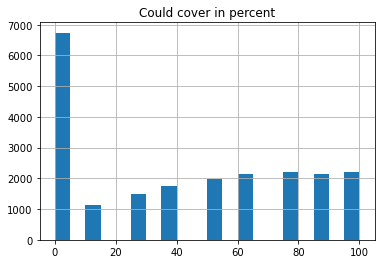

Most of the time it is a clear sky!


In [ ]:
print("Show distribution of Cloud Cover")
plt.title('Could cover in percent')
df_weather['CloudCoverPERCENT'].hist(bins=20,range=[0,100])
plt.show()
print("Most of the time it is a clear sky!")

In [ ]:
df_weather['CloudCoverPERCENT'] = df_weather['CloudCoverPERCENT'].astype('category')

Check temperature values for outliers


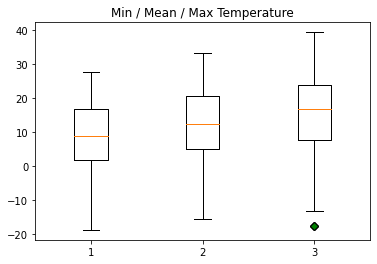

In [ ]:
print("Check temperature values for outliers")
green_diamond = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('Min / Mean / Max Temperature')
ax1.boxplot([df_weather['Min.TemperatureC'], df_weather['Mean.TemperatureC'].dropna(), df_weather['Max.TemperatureC']], flierprops=green_diamond)
plt.show()

Check visibility values for outliers


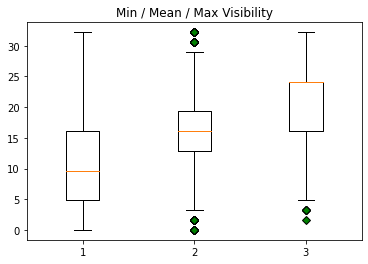

In [ ]:
print("Check visibility values for outliers")
green_diamond = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('Min / Mean / Max Visibility')
ax1.boxplot([df_weather['Min.VisibilityKM'].dropna(), df_weather['Mean.VisibilityKM'].dropna(), df_weather['Max.VisibilityKM'].dropna()], flierprops=green_diamond)
plt.show()

Check humidity values for outliers


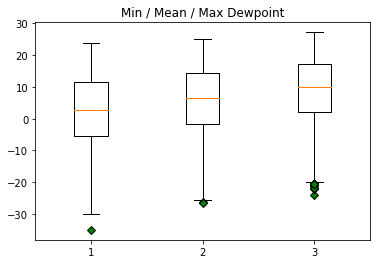

In [ ]:
print("Check humidity values for outliers")
green_diamond = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('Min / Mean / Max Dewpoint')
ax1.boxplot([df_weather['Min.DewpointC'], df_weather['Mean.DewpointC'].dropna(), df_weather['Max.DewpointC']], flierprops=green_diamond)
plt.show()

Check wind speed for outliers


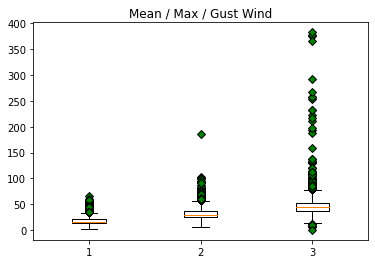

We see very high wind speeds (gusts) up to 375 km/h, which seems too high


In [ ]:
print("Check wind speed for outliers")
green_diamond = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('Mean / Max / Gust Wind')
ax1.boxplot([df_weather['Mean.Wind.SpeedKMH'].dropna(), df_weather['Max.Wind.SpeedKMH'].dropna(), df_weather['Max.Gust.SpeedKMH'].dropna()], flierprops=green_diamond)
plt.show()
print("We see very high wind speeds (gusts) up to 375 km/h, which seems too high")

Check wind direction for outliers


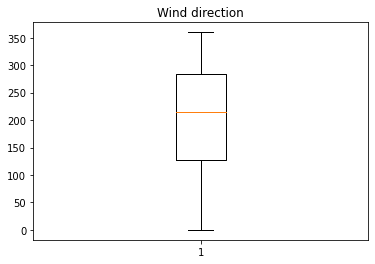

We see very high wind speeds (gusts) up to 375 km/h, which seems too high
The predominant wind direction is 210° (wind from south-west)


In [ ]:
print("Check wind direction for outliers")
green_diamond = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('Wind direction')
ax1.boxplot(df_weather['WindDirectionDEG'].dropna(), flierprops=green_diamond)
plt.show()
print("We see very high wind speeds (gusts) up to 375 km/h, which seems too high")
print("The predominant wind direction is 210° (wind from south-west)")

Show distribution of wind direction


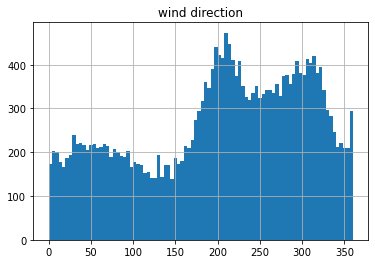

The predominant wind direction is 210° (wind from south-west)


In [ ]:
print("Show distribution of wind direction")
plt.title('wind direction')
df_weather['WindDirectionDEG'].hist(bins=90,range=[0,360])
plt.show()
print("The predominant wind direction is 210° (wind from south-west)")

In [ ]:
print("Weather data types after cleaning and conversion:")
print(f"{df_weather.dtypes}")

Weather data types after cleaning and conversion:
Unnamed: 0                             int64
Date                          datetime64[ns]
Max.Humidity                           int64
Mean.Humidity                          int64
Min.Humidity                           int64
PrecipitationIn                      float64
CloudCover                           float64
Events                                  |S26
city                                category
season                              category
WindDirectionDEG                       int32
Max.TemperatureC                     float64
Mean.TemperatureC                    float64
Min.TemperatureC                     float64
Max.DewpointC                        float64
Mean.DewpointC                       float64
Min.DewpointC                        float64
Min.VisibilityKM                     float64
Max.VisibilityKM                     float64
Mean.VisibilityKM                    float64
Max.Wind.SpeedKMH                    float64
Mean.

In [ ]:
print("Check for missing values in Weather:")
df_weather.isna().sum()

Check for missing values in Weather:


Unnamed: 0                        0
Date                              0
Max.Humidity                      0
Mean.Humidity                     0
Min.Humidity                      0
PrecipitationIn                 525
CloudCover                     2781
Events                            0
city                              0
season                            0
WindDirectionDEG                  0
Max.TemperatureC                  0
Mean.TemperatureC                 2
Min.TemperatureC                  0
Max.DewpointC                     0
Mean.DewpointC                    0
Min.DewpointC                     0
Min.VisibilityKM                 15
Max.VisibilityKM                 15
Mean.VisibilityKM                15
Max.Wind.SpeedKMH                 0
Mean.Wind.SpeedKMH                0
Max.Gust.SpeedKMH             15538
Max.Sea.Level.PressureHPA         0
Mean.Sea.Level.PressureHPA        0
Min.Sea.Level.PressureHPA         0
CloudCoverPERCENT              2781
PrecipitationMM             

In [ ]:
print(f"Show first and last rows of Weather - after cleaning and conversion:")
df_weather.iloc[[0, -1]]

Show first and last rows of Weather - after cleaning and conversion:


,Unnamed: 0,Date,Max.Humidity,Mean.Humidity,Min.Humidity,PrecipitationIn,CloudCover,Events,city,season,...,Max.VisibilityKM,Mean.VisibilityKM,Max.Wind.SpeedKMH,Mean.Wind.SpeedKMH,Max.Gust.SpeedKMH,Max.Sea.Level.PressureHPA,Mean.Sea.Level.PressureHPA,Min.Sea.Level.PressureHPA,CloudCoverPERCENT,PrecipitationMM
0,1,1948-07-01,93,65,46,0.00,0.0,b'Fog',New York City (USA),Summer,...,16.09344,11.265408,25.749504,12.874752,NaN,1018.287172,1016.255339,1015.239422,0.0,0.000
24559,24627,2015-12-31,93,71,49,0.06,7.0,b'Rain',New York City (USA),Winter,...,16.09344,16.093440,32.186880,19.312128,40.2336,1019.303089,1017.948533,1016.255339,87.5,1.524


# Joining the datasets

In [ ]:
df_citibike_weather = pd.merge(df_citibike, df_weather, how="left", on="Date")
df_citibike_weather.iloc[[1, -1]]

,uniqueid,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,...,Max.VisibilityKM,Mean.VisibilityKM,Max.Wind.SpeedKMH,Mean.Wind.SpeedKMH,Max.Gust.SpeedKMH,Max.Sea.Level.PressureHPA,Mean.Sea.Level.PressureHPA,Min.Sea.Level.PressureHPA,CloudCoverPERCENT,PrecipitationMM
1,1043212,1542,2015-04-13 08:07:06,2015-04-13 08:32:48,545,E 23 St & 1 Ave,40.736502,-73.978095,415,Pearl St & Hanover Square,...,16.09344,16.09344,46.670976,22.530816,61.155072,1029.462256,1025.737228,1022.350839,62.5,0.0
99379,8672150,418,2015-11-14 15:39:48,2015-11-14 15:46:46,317,E 6 St & Avenue B,40.724537,-73.981854,301,E 2 St & Avenue B,...,16.09344,16.09344,46.670976,28.968192,61.155072,1025.398589,1018.287172,1011.175755,25.0,0.0


In [ ]:
print(f"Rowcount of citibike dataset: {len(df_citibike)} elements")
print(f"Rowcount of citibike dataset: {len(df_weather)} elements")
print(f"Rowcount of citibike dataset: {len(df_citibike_weather)} elements\n")

print(f"Columncount of citibike dataset: {len(df_citibike.columns)} elements")
print(f"Columncount of citibike dataset: {len(df_weather.columns)} elements")
print(f"Columncount of citibike dataset: {len(df_citibike_weather.columns)} elements")

Rowcount of citibike dataset: 99380 elements
Rowcount of citibike dataset: 24560 elements
Rowcount of citibike dataset: 99380 elements

Columncount of citibike dataset: 17 elements
Columncount of citibike dataset: 28 elements
Columncount of citibike dataset: 44 elements


In [ ]:
# TODO: Check NaN or Null or whatever it is called values and check the general validity of the joined table

Everything seems fine with the joined dataframe. The Rowcount matches (since we did a left join) and the Columncount matches as well (17 + 27 = 44. Subtract one because of the duplicate Date column -> 43)